<a href="https://colab.research.google.com/github/muhammadnouman911/CNN-And-ANN-Practice-Code/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 2: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# STEP 3: Load Dataset
df = pd.read_csv('/content/drive/MyDrive/ANN/Churn_Modelling.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# STEP 4: Preprocessing

# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode Gender (Male=1, Female=0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One-hot encode 'Geography' (drop first to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# STEP 5: Build ANN Model

model = Sequential()
model.add(Dense(units=11, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Output for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# STEP 6: Train the Model

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.1, verbose=1)


Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6193 - loss: 0.6595 - val_accuracy: 0.7975 - val_loss: 0.4712
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.4527 - val_accuracy: 0.8075 - val_loss: 0.4330
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8116 - loss: 0.4278 - val_accuracy: 0.8213 - val_loss: 0.4156
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8187 - loss: 0.4123 - val_accuracy: 0.8288 - val_loss: 0.4026
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.4057 - val_accuracy: 0.8400 - val_loss: 0.3865
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3930 - val_accuracy: 0.8400 - val_loss: 0.3730
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8569 - loss: 0.3657 - val_accuracy: 0.8512 - val_loss: 0.3591
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8612 - loss: 0.3601 - val_accuracy: 0.

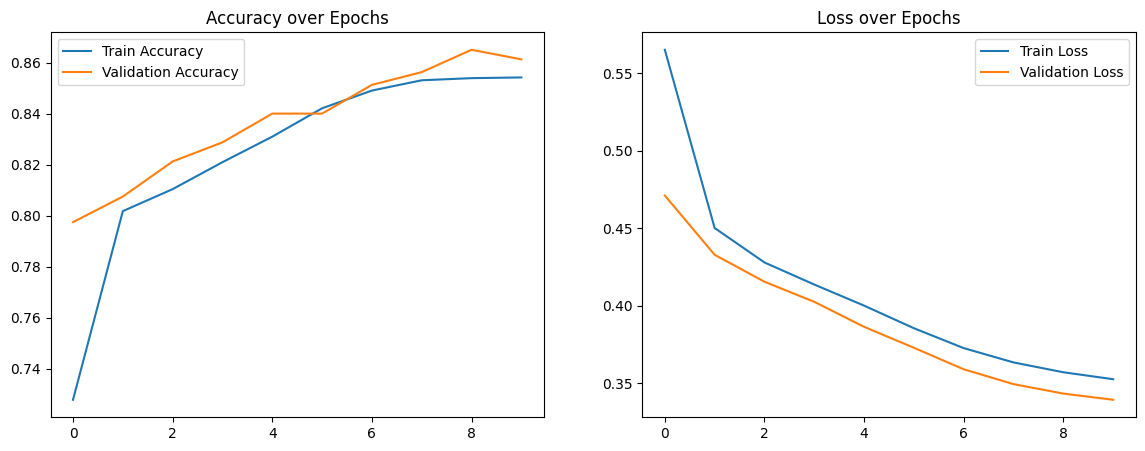

In [ ]:
# STEP 7: Plot Training Accuracy and Loss

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [ ]:
# STEP 8: Evaluate Model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8569 - loss: 0.3365
Test Accuracy: 0.86


In [ ]:
# STEP 9: Make Predictions

y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Show predictions vs actual
print("Predicted:", y_pred[:10])
print("Actual:   ", y_test.values[:10])


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted: [0 0 0 0 0 1 0 0 0 1]
Actual:    [0 1 0 0 0 1 0 0 1 1]
